In [14]:
import numpy as np
import pandas as pd
import os
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.snowball import SnowballStemmer
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

C:\Users\shrav\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
os.getcwd()

'C:\\Users\\shrav'

In [3]:
os.chdir("C:\\73 Strings_Case Study")

In [4]:
train = pd.read_csv("train.tsv",sep='\t')
test = pd.read_csv("test.tsv",sep='\t')

In [5]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [6]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [7]:
train.drop(['PhraseId','SentenceId'],axis=1,inplace=True)

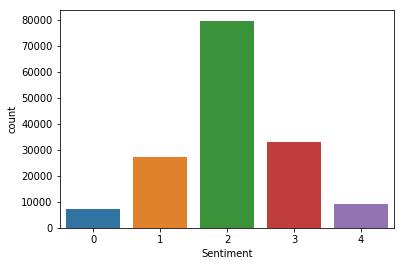

In [93]:
sns.countplot(x='Sentiment',data=train)

In [96]:
train['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [46]:
#Data Pre-Processing

In [11]:
train['Phrase'] = train['Phrase'].str.lower()
train['Phrase'] = train['Phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [13]:
train['Phrase']

0         a series of escapades demonstrating the adage ...
1         a series of escapades demonstrating the adage ...
2                                                  a series
3                                                         a
4                                                    series
5         of escapades demonstrating the adage that what...
6                                                        of
7         escapades demonstrating the adage that what is...
8                                                 escapades
9         demonstrating the adage that what is good for ...
10                                  demonstrating the adage
11                                            demonstrating
12                                                the adage
13                                                      the
14                                                    adage
15                          that what is good for the goose
16                                      

In [12]:
test['Phrase'] = test['Phrase'].str.lower()
test['Phrase'] = test['Phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [19]:
x_train = train['Phrase']
y_train = train['Sentiment']

In [20]:
tokenizer = Tokenizer()

In [21]:
tokenizer.fit_on_texts(x_train)

In [24]:
x_test = test['Phrase']

In [25]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [26]:
max_length = max([len(s.split()) for s in train['Phrase']])
x_train = pad_sequences(x_train,max_length)
x_test = pad_sequences(x_test,max_length)

In [27]:
x_train

array([[   0,    0,    0, ...,    3,    2,   40],
       [   0,    0,    0, ...,   13,    1, 3513],
       [   0,    0,    0, ...,    0,    2,  304],
       ...,
       [   0,    0,    0, ...,    0, 9612, 9613],
       [   0,    0,    0, ...,    0,    0, 9612],
       [   0,    0,    0, ...,    0,    0, 9613]])

In [28]:
x_test

array([[    0,     0,     0, ...,   559,   968,   368],
       [    0,     0,     0, ...,   559,   968,   368],
       [    0,     0,     0, ...,     0,     0,    16],
       ...,
       [    0,     0,     0, ...,     0,     2, 10761],
       [    0,     0,     0, ...,     0,     2, 10761],
       [    0,     0,     0, ...,     0,   361,  1903]])

In [29]:
print(x_train.shape)

(156060, 48)


In [30]:
print(x_test.shape)

(66292, 48)


In [31]:
unknown = len(tokenizer.word_index)+1

In [32]:
unknown

16378

In [33]:
#Model Building

In [47]:
Embedding_dim=100
UK = unknown
model=Sequential()
model.add(Embedding(UK,Embedding_dim,input_length=max_length))
model.add(LSTM(units=128,dropout=0.3,recurrent_dropout=0.3))
model.add(Dense(5,activation='softmax'))

In [48]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [90]:
hist = model.fit(x_train,y_train,epochs=5,batch_size=1024,verbose=1)

Epoch 1/5
156060/156060 [==============================] - 685s 4ms/sample - loss: 0.7315 - acc: 0.7006
Epoch 2/5
156060/156060 [==============================] - 1048s 7ms/sample - loss: 0.7023 - acc: 0.7089
Epoch 3/5
156060/156060 [==============================] - 1011s 6ms/sample - loss: 0.6799 - acc: 0.7160
Epoch 4/5
156060/156060 [==============================] - 598s 4ms/sample - loss: 0.6590 - acc: 0.7237
Epoch 5/5
156060/156060 [==============================] - 627s 4ms/sample - loss: 0.6411 - acc: 0.7298


In [91]:
LSTM_pred = model.predict_classes(x_test)

In [92]:
LSTM_P = pd.read_csv("sampleSubmission.csv",sep=',')
LSTM_P.Sentiment = LSTM_pred
LSTM_P.to_csv("LSTM3.csv",sep=',',index=False)

In [83]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier

In [53]:
lr=LogisticRegression()

In [54]:
LR_Mod = lr.fit(x_train,y_train)

C:\Users\shrav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\shrav\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [56]:
LR_pred = lr.predict(x_test)

In [57]:
LR_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [58]:
LR_p = pd.read_csv("sampleSubmission.csv",sep=',')
LR_p.Sentiment = LR_pred
LR_p.to_csv("LR.csv",sep=',',index=False)

In [77]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [60]:
nb = MultinomialNB()

In [61]:
nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [62]:
nb_pred = nb.predict(x_test)

In [63]:
nb_pred

array([1, 1, 2, ..., 2, 2, 2], dtype=int64)

In [64]:
nb_p = pd.read_csv("sampleSubmission.csv",sep=',')
nb_p.Sentiment = nb_pred
nb_p.to_csv("nb.csv",sep=',',index=False)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
RF = RandomForestClassifier()

In [67]:
RF.fit(x_train,y_train)

C:\Users\shrav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
RF_pred = RF.predict(x_test)

In [69]:
RF_p = pd.read_csv("sampleSubmission.csv",sep=',')
RF_p.Sentiment = RF_pred
RF_p.to_csv("RF.csv",sep=',',index=False)

In [70]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier


In [71]:
GB = GradientBoostingClassifier()

In [72]:
GB.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [73]:
GB_pred = GB.predict(x_test)

In [75]:
GB_p = pd.read_csv("sampleSubmission.csv",sep=',')
GB_p.Sentiment = GB_pred
GB_p.to_csv("GB.csv",sep=',',index=False)

In [78]:
Gnb = GaussianNB()

In [79]:
VC = VotingClassifier(estimators=[('lr',lr), ('gnb',Gnb), ('gb',GB), ('rf',RF)],voting='hard')

In [80]:
VC = VC.fit(x_train,y_train)

C:\Users\shrav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\shrav\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [81]:
print(VC.predict(x_test))

[2 2 2 ... 2 2 2]


In [82]:
VC_p = pd.read_csv("sampleSubmission.csv",sep=',')
VC_p.Sentiment = VC.predict(x_test)
VC_p.to_csv("VC.csv",sep=',',index=False)

In [84]:
RC = RidgeClassifier()

In [85]:
RC.fit(x_train,y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [86]:
RC_pred = RC.predict(x_test)

In [87]:
RC_p = pd.read_csv("sampleSubmission.csv",sep=',')
RC_p.Sentiment = RC_pred
RC_p.to_csv("RC.csv",sep=',',index=False)